In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Importa o dataset do Kaggle 'Fall Detection'
df =  pd.read_csv('/content/drive/MyDrive/XP/Bootcamp_arq_ML/fall_detection.csv')

# Análise Exploratoria dos Dados

In [ ]:
df.shape

(16382, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     16382 non-null  int64  
 1   TIME         16382 non-null  float64
 2   SL           16382 non-null  float64
 3   EEG          16382 non-null  float64
 4   BP           16382 non-null  int64  
 5   HR           16382 non-null  int64  
 6   CIRCLUATION  16382 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [ ]:
df.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [ ]:
df.groupby('ACTIVITY')['HR'].mean()

,HR
ACTIVITY,
0,257.389323
1,118.109562
2,168.487210
3,215.602285
4,200.231254
5,192.721564


In [ ]:
df['ACTIVITY'].nunique()

6

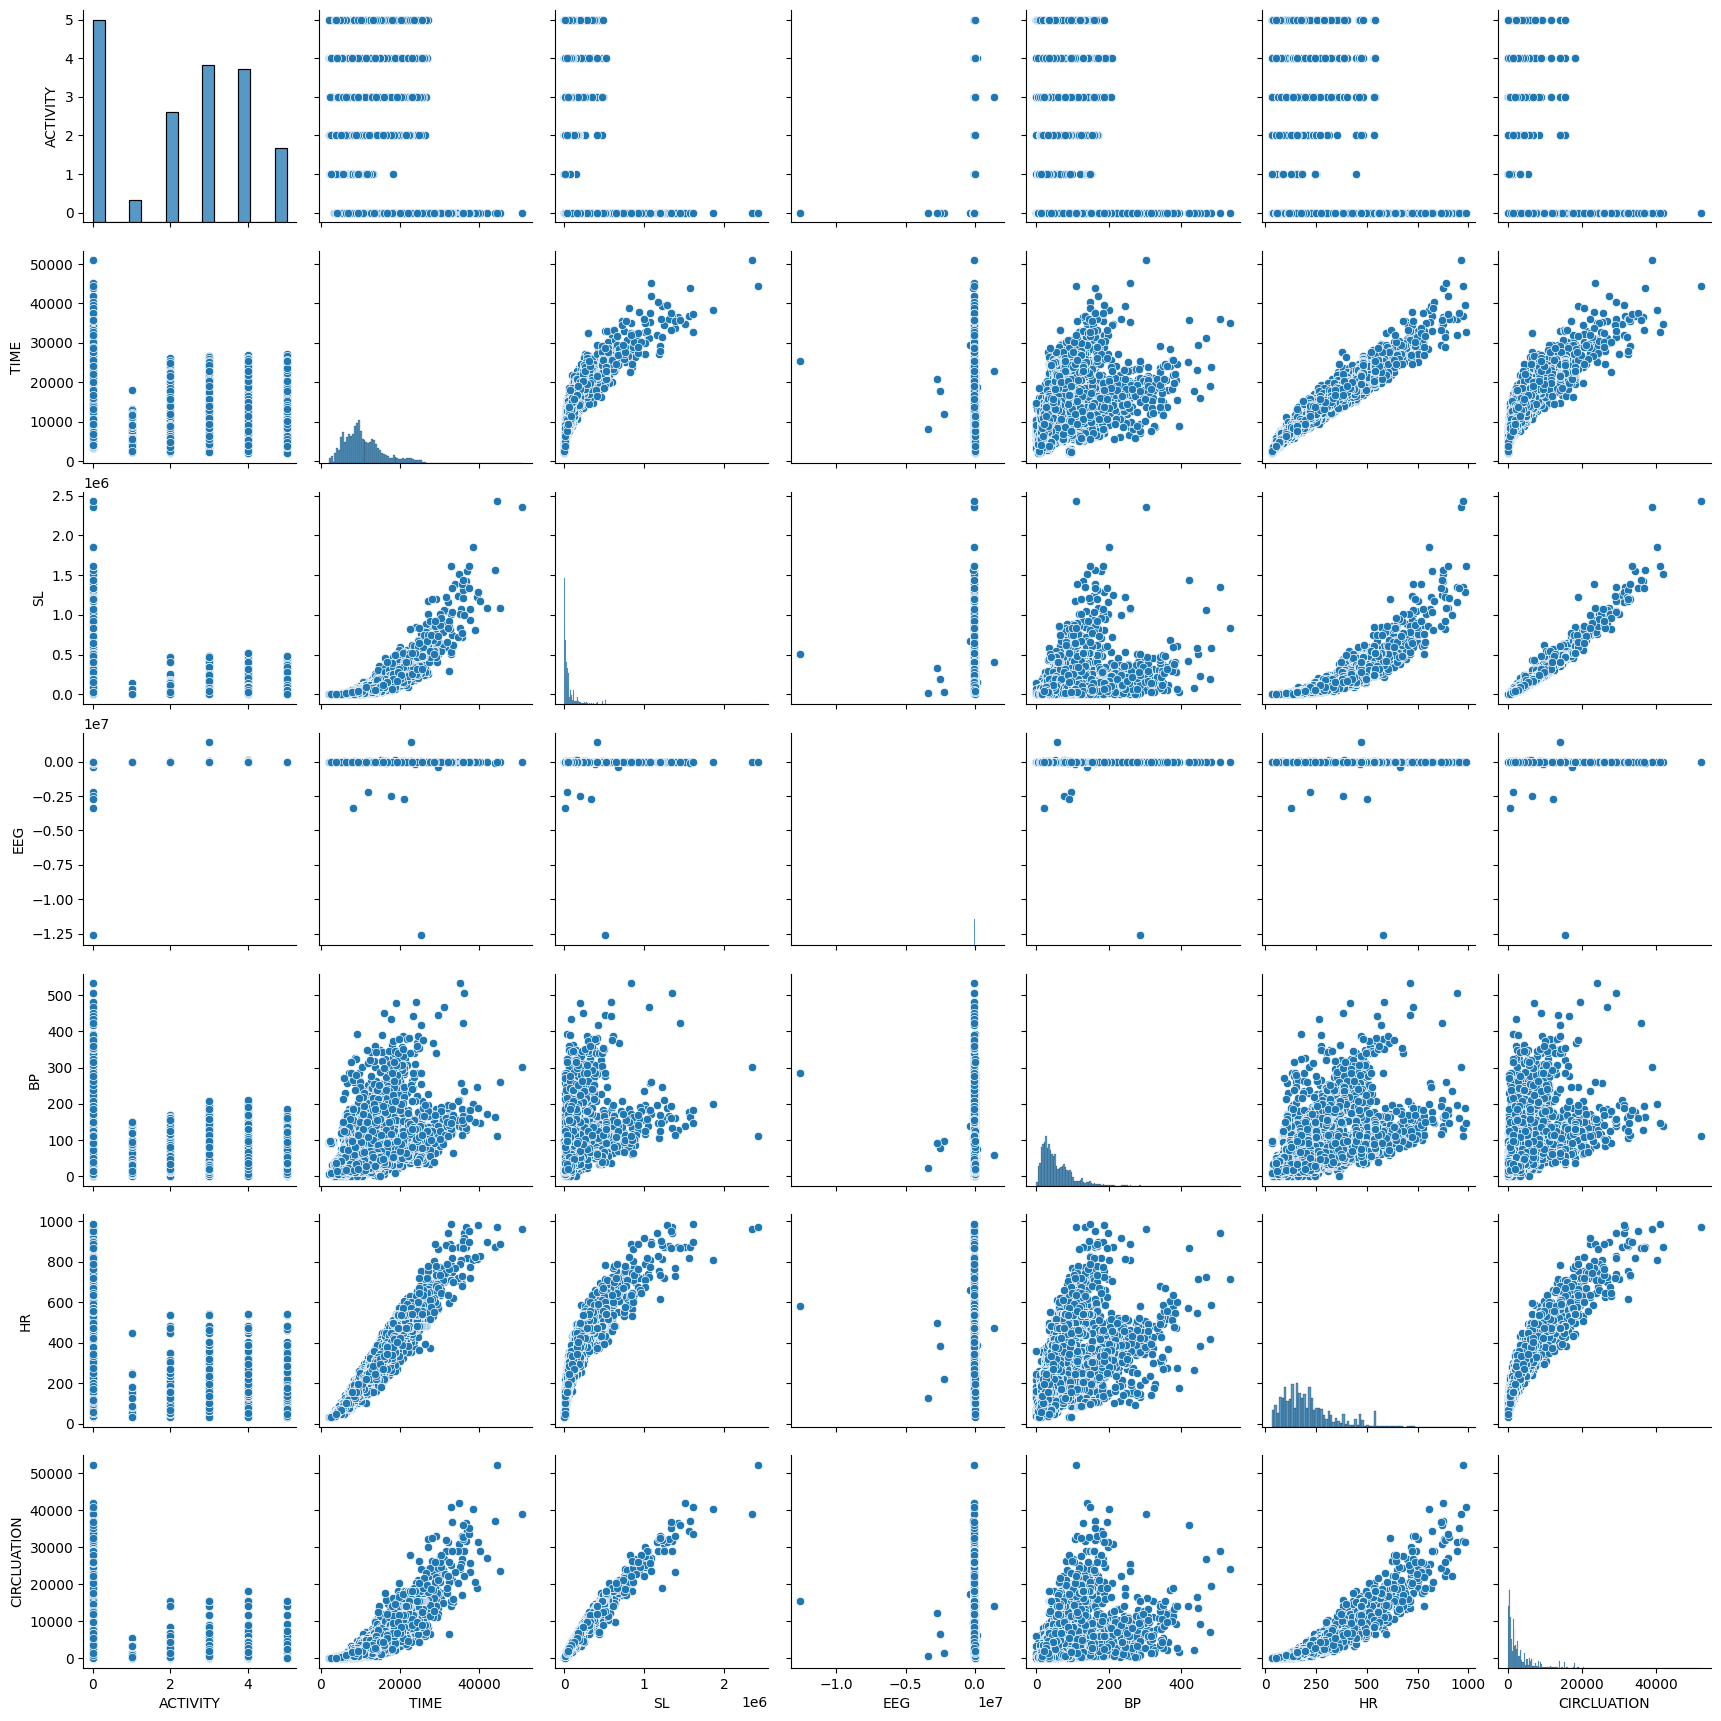

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
ACTIVITY,1.000000,-0.110405,-0.146789,0.027084,-0.116499,-0.144609,-0.134331
TIME,-0.110405,1.000000,0.843200,-0.048278,0.442334,0.973901,0.876956
SL,-0.146789,0.843200,1.000000,-0.050946,0.401064,0.859408,0.978060
EEG,0.027084,-0.048278,-0.050946,1.000000,-0.049892,-0.050316,-0.050408
BP,-0.116499,0.442334,0.401064,-0.049892,1.000000,0.469164,0.419356
HR,-0.144609,0.973901,0.859408,-0.050316,0.469164,1.000000,0.904160
CIRCLUATION,-0.134331,0.876956,0.978060,-0.050408,0.419356,0.904160,1.000000


In [ ]:
# Calcula a correlação de Pearson entre as variáveis especificadas
correlation_matrix = df[['TIME','SL','EEG','BP','HR','CIRCLUATION']].corr(method='pearson')

# Encontra o maior coeficiente de correlação em valor absoluto, excluindo a diagonal (autocorrelação)
np.fill_diagonal(correlation_matrix.values, 0)  # Substitui a diagonal por 0

# Encontra o maior valor absoluto e suas posições
max_abs_corr = np.max(np.abs(correlation_matrix.values))
row_max, col_max = np.unravel_index(np.argmax(np.abs(correlation_matrix.values)), correlation_matrix.shape)

# Obtém os nomes das variáveis com maior correlação
var1 = correlation_matrix.index[row_max]
var2 = correlation_matrix.columns[col_max]


print(f"As duas variáveis com maior coeficiente de correlação de Pearson em valor absoluto são: {var1} e {var2}")
print(f"O coeficiente de correlação entre elas é: {correlation_matrix.iloc[row_max, col_max]}")


As duas variáveis com maior coeficiente de correlação de Pearson em valor absoluto são: SL e CIRCLUATION
O coeficiente de correlação entre elas é: 0.9780597361779415


<Axes: ylabel='BP'>

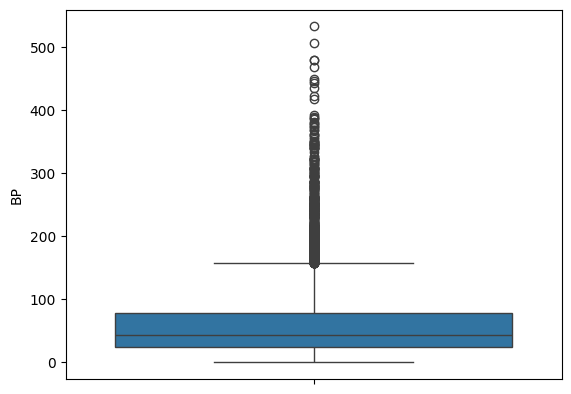

In [ ]:
sns.boxplot(df['BP'])

<Axes: ylabel='HR'>

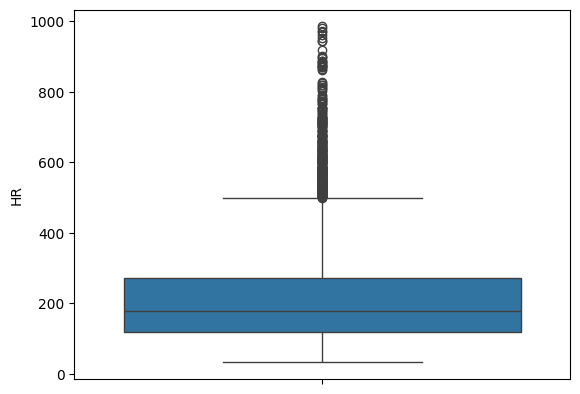

In [ ]:
sns.boxplot(df['HR'])

# Pré-processamento

In [ ]:
norm = StandardScaler()
df_norm = norm.fit_transform(df[['TIME','SL','EEG','BP','HR','CIRCLUATION']])
df_norm = pd.DataFrame(df_norm, columns=['TIME','SL','EEG','BP','HR','CIRCLUATION'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_norm, df['ACTIVITY'], test_size = 0.3,random_state=42)

# Treinamento dos Algorítmos

LogisticRegression

              precision    recall  f1-score   support

           0       0.44      0.71      0.54      1372
           1       0.00      0.00      0.00       144
           2       0.31      0.33      0.32       716
           3       0.36      0.42      0.39      1115
           4       0.29      0.17      0.21      1081
           5       0.00      0.00      0.00       487

    accuracy                           0.38      4915
   macro avg       0.23      0.27      0.24      4915
weighted avg       0.31      0.38      0.33      4915

[[979   0 100 213  80   0]
 [ 41   0  94   2   7   0]
 [205   0 235 171 105   0]
 [379   0 124 471 141   0]
 [417   0 150 335 179   0]
 [215   0  64 100 108   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

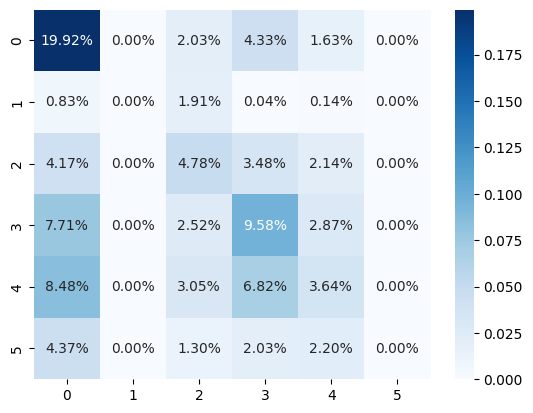

In [ ]:
lr = LogisticRegression(max_iter=1000,random_state=42)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues')

KNNClassifier

              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1372
           1       0.66      0.77      0.71       144
           2       0.59      0.74      0.66       716
           3       0.56      0.65      0.60      1115
           4       0.58      0.56      0.57      1081
           5       0.57      0.48      0.52       487

    accuracy                           0.64      4915
   macro avg       0.63      0.65      0.64      4915
weighted avg       0.65      0.64      0.64      4915

[[941  11  70 132 150  68]
 [  2 111  28   3   0   0]
 [ 12  30 529 120  14  11]
 [ 44   9 170 720 155  17]
 [ 82   5  78 231 601  84]
 [ 43   1  21  73 115 234]]


<Axes: >

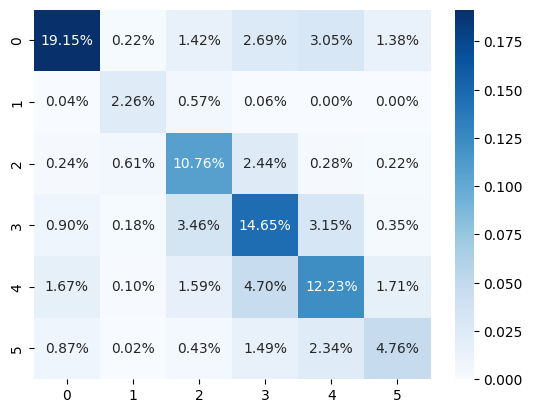

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues')

DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1372
           1       0.69      0.72      0.70       144
           2       0.64      0.69      0.66       716
           3       0.62      0.62      0.62      1115
           4       0.59      0.59      0.59      1081
           5       0.50      0.51      0.51       487

    accuracy                           0.68      4915
   macro avg       0.66      0.66      0.66      4915
weighted avg       0.69      0.68      0.68      4915

[[1164    4   33   49   67   55]
 [   2  103   33    2    3    1]
 [  16   32  495  122   39   12]
 [  19    8  166  695  187   40]
 [  42    2   38  219  640  140]
 [  31    0   13   42  152  249]]


<Axes: >

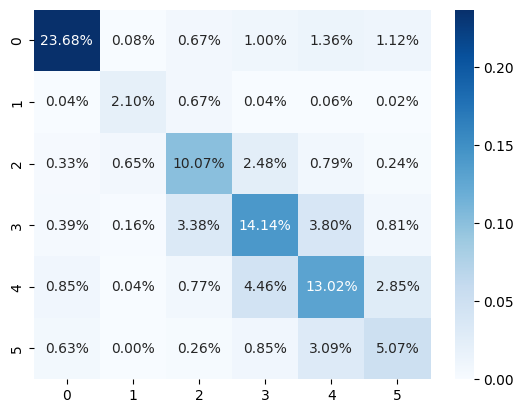

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues')

RandomForestClassifier

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1372
           1       0.79      0.82      0.81       144
           2       0.73      0.78      0.75       716
           3       0.68      0.72      0.70      1115
           4       0.67      0.67      0.67      1081
           5       0.71      0.56      0.62       487

    accuracy                           0.77      4915
   macro avg       0.76      0.75      0.75      4915
weighted avg       0.77      0.77      0.77      4915

[[1306    2    7   26   25    6]
 [   1  118   23    1    1    0]
 [   4   24  557  107   21    3]
 [   8    4  129  803  160   11]
 [  27    1   35  204  720   94]
 [  21    0    9   41  143  273]]


<Axes: >

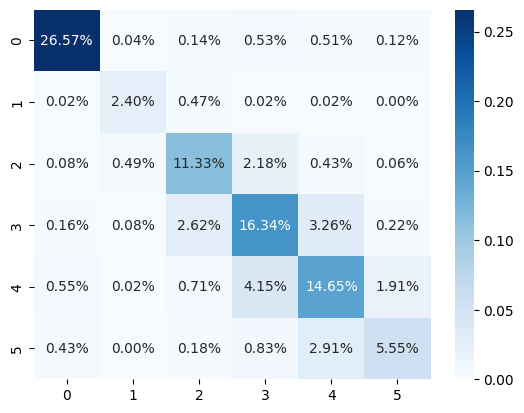

In [ ]:
rf = RandomForestClassifier(n_estimators = 50, random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues')

GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1372
           1       0.74      0.76      0.75       144
           2       0.68      0.76      0.72       716
           3       0.63      0.69      0.66      1115
           4       0.63      0.61      0.62      1081
           5       0.68      0.53      0.60       487

    accuracy                           0.73      4915
   macro avg       0.72      0.71      0.71      4915
weighted avg       0.73      0.73      0.73      4915

[[1240    3   15   40   53   21]
 [   1  110   33    0    0    0]
 [   7   27  545  113   21    3]
 [  12    5  154  768  167    9]
 [  36    4   44  245  663   89]
 [  24    0   12   49  142  260]]


<Axes: >

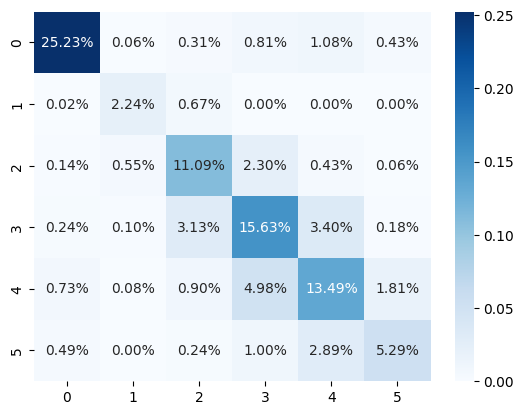

In [ ]:
gb = GradientBoostingClassifier(
                                n_estimators=50,
                                learning_rate = 0.2,
                                max_features=6,
                                max_depth = 5,
                                random_state = 42
                                )
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues')

SVC

              precision    recall  f1-score   support

           0       0.44      0.68      0.53      1372
           1       0.00      0.00      0.00       144
           2       0.38      0.38      0.38       716
           3       0.43      0.33      0.37      1115
           4       0.33      0.37      0.35      1081
           5       0.00      0.00      0.00       487

    accuracy                           0.40      4915
   macro avg       0.26      0.29      0.27      4915
weighted avg       0.35      0.40      0.37      4915

[[937   0  84 137 214   0]
 [ 79   0  61   3   1   0]
 [194   0 271 128 123   0]
 [324   0 124 370 297   0]
 [416   0  98 169 398   0]
 [202   0  68  54 163   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

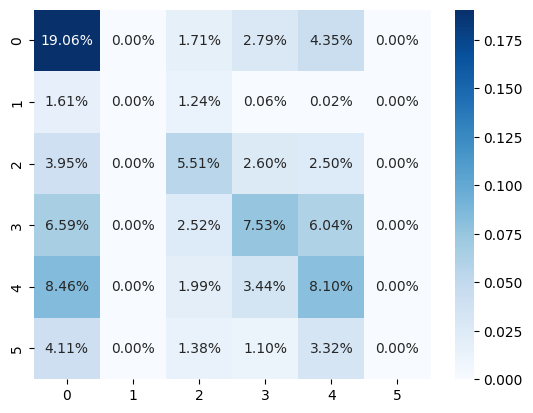

In [ ]:
svc = SVC(gamma='auto',kernel='rbf')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test, y_pred)

print(matriz_confusao)

seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues')